In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
df=pd.read_csv(r"C:\Users\Hp\OneDrive\Desktop\50_Startups (1).csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


<AxesSubplot:>

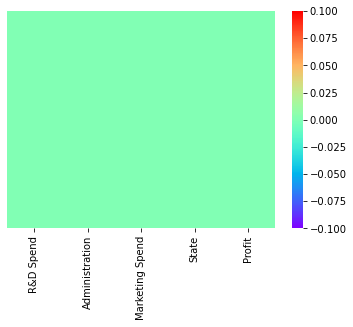

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='rainbow')

In [7]:
X=df.iloc[:,:4]
X

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida
5,131876.90,99814.71,362861.36,New York
6,134615.46,147198.87,127716.82,California
7,130298.13,145530.06,323876.68,Florida
8,120542.52,148718.95,311613.29,New York
9,123334.88,108679.17,304981.62,California


In [10]:
Y=df.iloc[:, 4:5]
Y

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94
5,156991.12
6,156122.51
7,155752.60
8,152211.77
9,149759.96


In [8]:
state=pd.get_dummies(X['State'])
state.head()

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [9]:
state.columns=['California','Florida','New York']

In [11]:
X.drop('State',axis=1,inplace=True)

In [12]:
X.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [15]:
X=pd.concat([X,state],axis=1)
X.head()

,R&D Spend,Administration,Marketing Spend,California,Florida,New York,California,Florida,New York
0,165349.20,136897.80,471784.10,0,0,1,0,0,1
1,162597.70,151377.59,443898.53,1,0,0,1,0,0
2,153441.51,101145.55,407934.54,0,1,0,0,1,0
3,144372.41,118671.85,383199.62,0,0,1,0,0,1
4,142107.34,91391.77,366168.42,0,1,0,0,1,0


In [26]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=5)

In [27]:
LR=LinearRegression()

In [28]:
LR.fit(X_train,Y_train)

LinearRegression()

In [29]:
y_pred=LR.predict(X_test)
y_pred

array([[ 71257.9642517 ],
       [ 98763.29146638],
       [155433.38819534],
       [110783.90688715],
       [100191.29117618],
       [128512.8606875 ],
       [182113.72388017],
       [ 57682.41800315],
       [172002.2190394 ],
       [116239.8859988 ],
       [ 94549.34281718],
       [171939.29643898],
       [ 97274.643359  ],
       [191268.76547334],
       [110968.93883749]])

In [30]:
score=r2_score(Y_test,y_pred)
score

0.9754154859051836